In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [55]:
data=pd.read_csv('coorg.sav.csv')
data.head()
data.drop('Name',axis=1).head()


,AGE,Gender,Domicile,Qualification,Religion,Occupation,Marital status,Socio economic status,Duration of illness,BFNE Score,PANSS score,P score,N score,G score,C score,CGI Score
0,40,F,Urban,Secondary,Muslim,House wife,Married,Low,15.0,27,45,7,11,27,-4,3
1,32,F,Urban,Graduated,Christian,Unemployed,Unmarried,Middle,4.0,30,71,27,14,30,13,5
2,35,F,Urban,Secondary,Hindu,House wife,Married,Middle,3.0,20,71,23,14,34,9,5
3,26,M,Rural,Inter,Hindu,Farmer,Married,Low,1.0,12,48,9,15,24,-6,4
4,31,M,Rural,Inter,Hindu,Unemployed,Married,Low,2.0,12,59,17,11,31,6,4


In [3]:
(data['Gender']).value_counts()

F    26
M    24
Name: Gender, dtype: int64

In [4]:
def gender(x):
    if x=='M':
        return 1
    else:
        return 2
data['Gender_cat']=data['Gender'].apply(gender)

In [5]:
(data['Socio economic status']).value_counts()

Low       43
Middle     7
Name: Socio economic status, dtype: int64

In [6]:
def ses(x):
    if x=='Low':
        return 1
    else:
        return 2
data['ses_cat']=data['Socio economic status'].apply(ses)

In [7]:
(data['Domicile']).value_counts()

Rural    36
Urban    14
Name: Domicile, dtype: int64

In [8]:
(data['Marital status']).value_counts()

Married      30
Unmarried    16
Widow         2
Divorced      1
Separated     1
Name: Marital status, dtype: int64

In [9]:
def year(x):
    if x<1:
        return "less than 1 year"
    elif 1<=x<5:
        return "01 to 5"
    elif 5<=x<10:
        return "05 to 10"
    elif 10<=x<15:
        return "10 to 15"
    elif 15<=x<20:
        return "15 to 20"
    elif 20<=x<25:
        return "20 to 25"
    else:
        return "25 and above"

data['duration of illness in years']=data['Duration of illness'].apply(year)

In [10]:
(data['duration of illness in years']).value_counts()

01 to 5             20
10 to 15             7
05 to 10             7
15 to 20             6
25 and above         6
less than 1 year     3
20 to 25             1
Name: duration of illness in years, dtype: int64

In [11]:
data['BFNE Score'].mean()

19.18

In [12]:
data['BFNE Score'].std()

7.438701883681435

In [54]:
d1=data[data['BFNE Score']>=25]

In [14]:
d1['Gender'].value_counts()

F    6
M    5
Name: Gender, dtype: int64

In [15]:
d1.shape

(11, 20)

In [16]:
d2=data[data['BFNE Score']<25]

In [17]:
data[data['BFNE Score']<25].mean()

AGE                    36.794872
Duration of illness     9.782051
BFNE Score             15.923077
PANSS score            68.230769
P score                17.948718
N score                17.692308
G score                32.615385
C score                 0.256410
CGI Score               4.410256
Gender_cat              1.512821
ses_cat                 1.076923
dtype: float64

In [18]:
(data['Religion']).value_counts()

Hindu        43
Muslim        5
Christian     2
Name: Religion, dtype: int64

In [19]:
(data['Qualification']).value_counts()

Secondary     19
Illiterate    17
Graduated      8
Inter          4
Primary        2
Name: Qualification, dtype: int64

In [20]:
(data['BFNE Score']>=25).value_counts()

False    39
True     11
Name: BFNE Score, dtype: int64

In [21]:
def bfne(x):
    if 0<=x<25:
        return "less than 25"
    else:
        return "more than 25"
    
data['BFNE Score_cat']=data['BFNE Score'].apply(bfne)
data.head()        

,Name,AGE,Gender,Domicile,Qualification,Religion,Occupation,Marital status,Socio economic status,Duration of illness,...,PANSS score,P score,N score,G score,C score,CGI Score,Gender_cat,ses_cat,duration of illness in years,BFNE Score_cat
0,Asma Begum,40,F,Urban,Secondary,Muslim,House wife,Married,Low,15.0,...,45,7,11,27,-4,3,2,1,15 to 20,more than 25
1,Prasanna kumari,32,F,Urban,Graduated,Christian,Unemployed,Unmarried,Middle,4.0,...,71,27,14,30,13,5,2,2,01 to 5,more than 25
2,Rajeswari,35,F,Urban,Secondary,Hindu,House wife,Married,Middle,3.0,...,71,23,14,34,9,5,2,2,01 to 5,less than 25
3,Y. Srikanth,26,M,Rural,Inter,Hindu,Farmer,Married,Low,1.0,...,48,9,15,24,-6,4,1,1,01 to 5,less than 25
4,Saketh,31,M,Rural,Inter,Hindu,Unemployed,Married,Low,2.0,...,59,17,11,31,6,4,1,1,01 to 5,less than 25


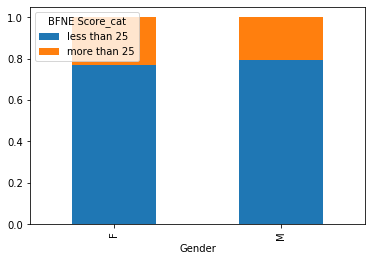

In [22]:
pd.crosstab(data['Gender'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()


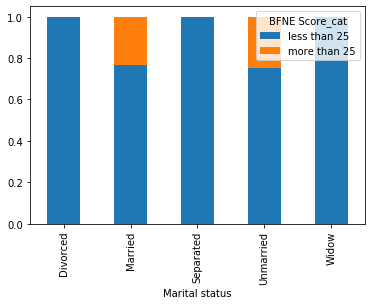

In [23]:
pd.crosstab(data['Marital status'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()

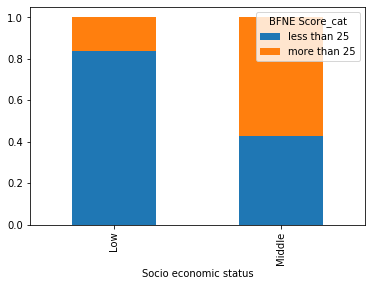

In [24]:
pd.crosstab(data['Socio economic status'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()

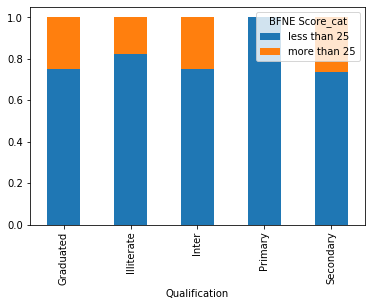

In [25]:
pd.crosstab(data['Qualification'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()

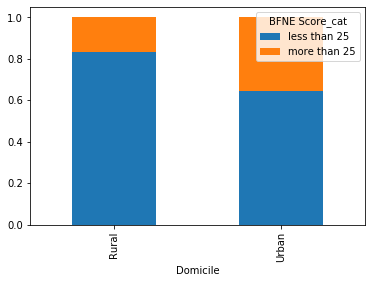

In [26]:
pd.crosstab(data['Domicile'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()

In [27]:
def age(x):
    if 0<=x<25:
        return "less than 25"
    elif 25<=x<45:
        return "25 - 45"
    else:
        return "more than 45"
data['Age_cat']=data['AGE'].apply(age)
data.head()        

,Name,AGE,Gender,Domicile,Qualification,Religion,Occupation,Marital status,Socio economic status,Duration of illness,...,P score,N score,G score,C score,CGI Score,Gender_cat,ses_cat,duration of illness in years,BFNE Score_cat,Age_cat
0,Asma Begum,40,F,Urban,Secondary,Muslim,House wife,Married,Low,15.0,...,7,11,27,-4,3,2,1,15 to 20,more than 25,25 - 45
1,Prasanna kumari,32,F,Urban,Graduated,Christian,Unemployed,Unmarried,Middle,4.0,...,27,14,30,13,5,2,2,01 to 5,more than 25,25 - 45
2,Rajeswari,35,F,Urban,Secondary,Hindu,House wife,Married,Middle,3.0,...,23,14,34,9,5,2,2,01 to 5,less than 25,25 - 45
3,Y. Srikanth,26,M,Rural,Inter,Hindu,Farmer,Married,Low,1.0,...,9,15,24,-6,4,1,1,01 to 5,less than 25,25 - 45
4,Saketh,31,M,Rural,Inter,Hindu,Unemployed,Married,Low,2.0,...,17,11,31,6,4,1,1,01 to 5,less than 25,25 - 45


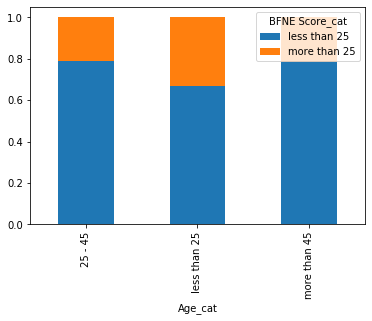

In [28]:
pd.crosstab(data['Age_cat'],data['BFNE Score_cat'],normalize=0).plot.bar(stacked=True,legend=True)
plt.show()

In [29]:
data1=data.drop(['Name','AGE','Gender','Domicile','Qualification','Religion','Occupation','Marital status',
           'Socio economic status','Duration of illness','Age_cat','C score','BFNE Score_cat','duration of illness in years'],axis=1)
data1.head()

,BFNE Score,PANSS score,P score,N score,G score,CGI Score,Gender_cat,ses_cat
0,27,45,7,11,27,3,2,1
1,30,71,27,14,30,5,2,2
2,20,71,23,14,34,5,2,2
3,12,48,9,15,24,4,1,1
4,12,59,17,11,31,4,1,1


In [30]:
x=data1.drop('BFNE Score',axis=1)
y=data1['BFNE Score']
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
predictions=model.predict(x_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BFNE Score   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.671
Date:                Fri, 10 Jan 2020   Prob (F-statistic):             0.0222
Time:                        21:00:13   Log-Likelihood:                -161.57
No. Observations:                  50   AIC:                             339.1
Df Residuals:                      42   BIC:                             354.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0806      6.300      1.283      0.207      -4.634      20.795
PANSS score    -1.2721      6.922     -0.184      0.855     -15.242      12.698
P score         0.8964      6.918      0.130      0.898     -13.064      14.857
N score         1.2293      6.933      0.177      0.860     -12.762      15.220
G score         1.6369      6.942      0.236      0.815     -12.374      15.647
CGI Score      -1.5760      1.729     -0.912      0.367      -5.064       1.912
Gender_cat      3.2861      2.042      1.609      0.115      -0.835       7.408
ses_cat         7.1354      2.971      2.402      0.021       1.140      13.131
==============================================================================
Omnibus:                       29.018   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.929
Skew:                           1.740   Prob(JB):                     2.63e-13
Kurtosis:                       6.963   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_var = sm.add_constant(x)
model = sm.OLS(y,X_var).fit()
model.pvalues

const          0.206682
PANSS score    0.855083
P score        0.897510
N score        0.860109
G score        0.814752
CGI Score      0.367123
Gender_cat     0.115103
ses_cat        0.020818
dtype: float64

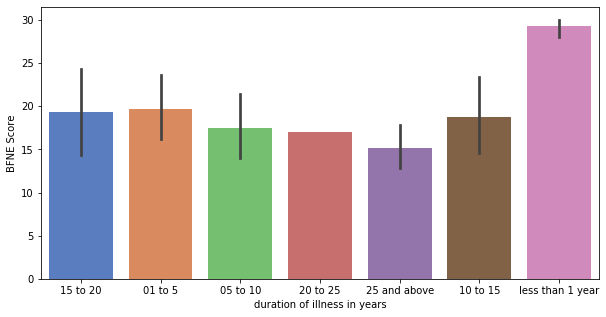

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='duration of illness in years', y='BFNE Score', data=data,palette='muted');

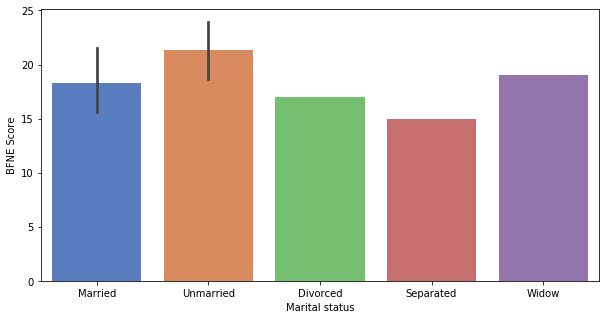

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='Marital status', y='BFNE Score', data=data,palette='muted');

In [34]:
X = data1.drop('BFNE Score', axis=1)
y= data1['BFNE Score']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.27208007  0.89643853  1.22931794  1.63686314 -1.5759964   3.28614643
  7.13537922]
Intercept: 8.080629588141285
R^2 score: 0.3080628675369661


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(35, 7)
(15, 7)


In [36]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BFNE Score   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.671
Date:                Fri, 10 Jan 2020   Prob (F-statistic):             0.0222
Time:                        21:00:16   Log-Likelihood:                -161.57
No. Observations:                  50   AIC:                             339.1
Df Residuals:                      42   BIC:                             354.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0806      6.300      1.283      0.207      -4.634      20.795
PANSS score    -1.2721      6.922     -0.184      0.855     -15.242      12.698
P score         0.8964      6.918      0.130      0.898     -13.064      14.857
N score         1.2293      6.933      0.177      0.860     -12.762      15.220
G score         1.6369      6.942      0.236      0.815     -12.374      15.647
CGI Score      -1.5760      1.729     -0.912      0.367      -5.064       1.912
Gender_cat      3.2861      2.042      1.609      0.115      -0.835       7.408
ses_cat         7.1354      2.971      2.402      0.021       1.140      13.131
==============================================================================
Omnibus:                       29.018   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.929
Skew:                           1.740   Prob(JB):                     2.63e-13
Kurtosis:                       6.963   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

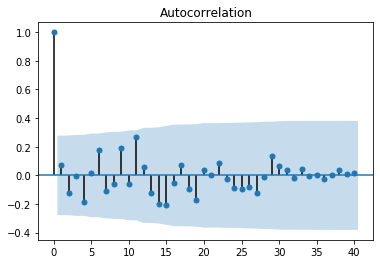

In [37]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [38]:
data['BFNE Score_cat']=data['BFNE Score'].apply(bfne)
data.head()        

,Name,AGE,Gender,Domicile,Qualification,Religion,Occupation,Marital status,Socio economic status,Duration of illness,...,P score,N score,G score,C score,CGI Score,Gender_cat,ses_cat,duration of illness in years,BFNE Score_cat,Age_cat
0,Asma Begum,40,F,Urban,Secondary,Muslim,House wife,Married,Low,15.0,...,7,11,27,-4,3,2,1,15 to 20,more than 25,25 - 45
1,Prasanna kumari,32,F,Urban,Graduated,Christian,Unemployed,Unmarried,Middle,4.0,...,27,14,30,13,5,2,2,01 to 5,more than 25,25 - 45
2,Rajeswari,35,F,Urban,Secondary,Hindu,House wife,Married,Middle,3.0,...,23,14,34,9,5,2,2,01 to 5,less than 25,25 - 45
3,Y. Srikanth,26,M,Rural,Inter,Hindu,Farmer,Married,Low,1.0,...,9,15,24,-6,4,1,1,01 to 5,less than 25,25 - 45
4,Saketh,31,M,Rural,Inter,Hindu,Unemployed,Married,Low,2.0,...,17,11,31,6,4,1,1,01 to 5,less than 25,25 - 45


In [39]:
data001=data[data['Gender']=='M']
more_than_25=data001[data001['BFNE Score']>=25]
more_than_25.mean()


AGE                    33.60
Duration of illness     3.78
BFNE Score             28.80
PANSS score            98.60
P score                21.20
N score                26.80
G score                50.60
C score                -5.60
CGI Score               5.40
Gender_cat              1.00
ses_cat                 1.40
dtype: float64

In [40]:
less_than_25=data[data['BFNE Score']<25]
less_than_25.mean()

AGE                    36.794872
Duration of illness     9.782051
BFNE Score             15.923077
PANSS score            68.230769
P score                17.948718
N score                17.692308
G score                32.615385
C score                 0.256410
CGI Score               4.410256
Gender_cat              1.512821
ses_cat                 1.076923
dtype: float64

In [41]:
d1=pd.DataFrame({'Age':[ 36.794872,38.727273]})
table = pd.pivot_table(d1, index =['BFNE Score less than 25', 'BFNE Score more than 25']) 
  
table 

,Age
BFNE Score less than 25,36.794872
BFNE Score more than 25,38.727273


In [42]:
d1=pd.DataFrame({'Duration of illness':[ 9.782051,5.018182]})
table = pd.pivot_table(d1, index =['BFNE Score less than 25', 'BFNE Score more than 25']) 
  
table 

,Duration of illness
BFNE Score less than 25,9.782051
BFNE Score more than 25,5.018182


In [43]:
d1=pd.DataFrame({'Gender':[ 9.782051,5.018182]})
table = pd.pivot_table(d1, index =['BFNE Score less than 25', 'BFNE Score more than 25']) 
  
table 

,Gender
BFNE Score less than 25,9.782051
BFNE Score more than 25,5.018182


In [44]:
data001=data.groupby('BFNE Score_cat').mean()
data001.drop(['BFNE Score','PANSS score','P score','N score','G score','C score','CGI Score','Gender_cat','ses_cat'],axis=1)

,AGE,Duration of illness
BFNE Score_cat,,
less than 25,36.794872,9.782051
more than 25,38.727273,5.018182


In [45]:
d1=pd.crosstab(data['Age_cat'],data['BFNE Score'])
d1
from scipy.stats import chi2_contingency
chi2_contingency(d1)


(56.300643800643805,
 0.016777886695656476,
 36,
 array([[8.58, 0.66, 1.98, 2.64, 0.66, 1.98, 0.66, 3.96, 2.64, 0.66, 1.32,
         0.66, 1.32, 0.66, 0.66, 1.98, 0.66, 0.66, 0.66],
        [0.78, 0.06, 0.18, 0.24, 0.06, 0.18, 0.06, 0.36, 0.24, 0.06, 0.12,
         0.06, 0.12, 0.06, 0.06, 0.18, 0.06, 0.06, 0.06],
        [3.64, 0.28, 0.84, 1.12, 0.28, 0.84, 0.28, 1.68, 1.12, 0.28, 0.56,
         0.28, 0.56, 0.28, 0.28, 0.84, 0.28, 0.28, 0.28]]))

In [46]:
d1=pd.crosstab(data['duration of illness in years'],data['BFNE Score'])
d1
from scipy.stats import chi2_contingency
chi2_contingency(d1)


(125.1747557997558,
 0.12371044447123146,
 108,
 array([[5.2 , 0.4 , 1.2 , 1.6 , 0.4 , 1.2 , 0.4 , 2.4 , 1.6 , 0.4 , 0.8 ,
         0.4 , 0.8 , 0.4 , 0.4 , 1.2 , 0.4 , 0.4 , 0.4 ],
        [1.82, 0.14, 0.42, 0.56, 0.14, 0.42, 0.14, 0.84, 0.56, 0.14, 0.28,
         0.14, 0.28, 0.14, 0.14, 0.42, 0.14, 0.14, 0.14],
        [1.82, 0.14, 0.42, 0.56, 0.14, 0.42, 0.14, 0.84, 0.56, 0.14, 0.28,
         0.14, 0.28, 0.14, 0.14, 0.42, 0.14, 0.14, 0.14],
        [1.56, 0.12, 0.36, 0.48, 0.12, 0.36, 0.12, 0.72, 0.48, 0.12, 0.24,
         0.12, 0.24, 0.12, 0.12, 0.36, 0.12, 0.12, 0.12],
        [0.26, 0.02, 0.06, 0.08, 0.02, 0.06, 0.02, 0.12, 0.08, 0.02, 0.04,
         0.02, 0.04, 0.02, 0.02, 0.06, 0.02, 0.02, 0.02],
        [1.56, 0.12, 0.36, 0.48, 0.12, 0.36, 0.12, 0.72, 0.48, 0.12, 0.24,
         0.12, 0.24, 0.12, 0.12, 0.36, 0.12, 0.12, 0.12],
        [0.78, 0.06, 0.18, 0.24, 0.06, 0.18, 0.06, 0.36, 0.24, 0.06, 0.12,
         0.06, 0.12, 0.06, 0.06, 0.18, 0.06, 0.06, 0.06]]))

In [47]:
d0=pd.DataFrame({'P values':[ 0.01677,0.1237]})
table = pd.pivot_table(d0, index =['Age', 'Duration of illness']) 
  
table 

,P values
Age,0.01677
Duration of illness,0.12370


this shows that if the values of pvalue is less than 0.05 than reject the null value
that mean value lies beyond critical value towards the right

In [48]:
d1.head()

BFNE Score,12,13,14,15,16,17,18,19,20,23,24,25,27,28,29,30,32,35,45
duration of illness in years,,,,,,,,,,,,,,,,,,,
01 to 5,6,1,0,2,1,0,1,1,1,1,2,1,0,0,0,1,0,1,1
05 to 10,1,0,1,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
10 to 15,1,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0
15 to 20,2,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0
20 to 25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Variable','Total(n=50)','SZ + SAD*(n=11)','SZ – SAD*(n=39)','P-value','T-test']

x.add_row(["AGE", '37.22 ±10.06', '38.72 ±10.72', '36.79 ±9.98','0.651','0.46'])
x.add_row(["Duration of illness", '8.73 ±8.96', '5.018 ±5.70', '9.78 ±9.48','0.056','2.15'])
x.add_row(["BFNE Score", '19.18 ±7.43', '30.72 ±5.44', '15.92 ±3.75','0.000','7.03'])
x.add_row(["PANSS score", '71.42 ±22.42', '82.72 ±31.17', '68.23 ±18.57','0.256','1.20'])
x.add_row(["P score", '18.20 ±6.22', '19.09 ±8.43', '17.94 ±5.55','0.733','0.35'])
x.add_row(["N score", '18.52 ±9.37', '21.45 ±10.07', '17.69 ±9.13','0.356','0.96'])
x.add_row(["G score", '34.72 ±11.57', '42.18 ±17.07', '32.61 ±8.68','0.177','1.44'])
x.add_row(["CGI score", '4.50 ±1.01', '4.81 ±1.07', '4.41 ±0.99','0.351','0.97'])
print(x)

+---------------------+--------------+-----------------+-----------------+---------+--------+
|       Variable      | Total(n=50)  | SZ + SAD*(n=11) | SZ – SAD*(n=39) | P-value | T-test |
+---------------------+--------------+-----------------+-----------------+---------+--------+
|         AGE         | 37.22 ±10.06 |   38.72 ±10.72  |   36.79 ±9.98   |  0.651  |  0.46  |
| Duration of illness |  8.73 ±8.96  |   5.018 ±5.70   |    9.78 ±9.48   |  0.056  |  2.15  |
|      BFNE Score     | 19.18 ±7.43  |   30.72 ±5.44   |   15.92 ±3.75   |  0.000  |  7.03  |
|     PANSS score     | 71.42 ±22.42 |   82.72 ±31.17  |   68.23 ±18.57  |  0.256  |  1.20  |
|       P score       | 18.20 ±6.22  |   19.09 ±8.43   |   17.94 ±5.55   |  0.733  |  0.35  |
|       N score       | 18.52 ±9.37  |   21.45 ±10.07  |   17.69 ±9.13   |  0.356  |  0.96  |
|       G score       | 34.72 ±11.57 |   42.18 ±17.07  |   32.61 ±8.68   |  0.177  |  1.44  |
|      CGI score      |  4.50 ±1.01  |    4.81 ±1.07   |    

In [51]:
from scipy.stats import ttest_1samp

In [56]:
ttest_1samp(d1['AGE'],data['AGE'].mean(), axis=0)

Ttest_1sampResult(statistic=0.46612772426366267, pvalue=0.6511119391016256)

In [57]:
ttest_1samp(d1['Duration of illness'],data['Duration of illness'].mean(), axis=0)

Ttest_1sampResult(statistic=-2.159986536034732, pvalue=0.056110811121110535)

In [58]:
ttest_1samp(d1['BFNE Score'],data['BFNE Score'].mean(), axis=0)

Ttest_1sampResult(statistic=7.037146112904338, pvalue=3.553091473349097e-05)

In [59]:
ttest_1samp(d1['PANSS score'],data['PANSS score'].mean(), axis=0)

Ttest_1sampResult(statistic=1.2029891209276, pvalue=0.25668827014116047)

In [60]:
ttest_1samp(d1['P score'],data['P score'].mean(), axis=0)

Ttest_1sampResult(statistic=0.35044728452755414, pvalue=0.7332727395187177)

In [61]:
ttest_1samp(d1['N score'],data['N score'].mean(), axis=0)

Ttest_1sampResult(statistic=0.9661899526219321, pvalue=0.3567340535449962)

In [62]:
ttest_1samp(d1['G score'],data['G score'].mean(), axis=0)

Ttest_1sampResult(statistic=1.4493535084364546, pvalue=0.17786375958797307)

In [63]:
ttest_1samp(d1['CGI Score'],data['CGI Score'].mean(), axis=0)

Ttest_1sampResult(statistic=0.9782797401561587, pvalue=0.3510089893655409)

In [64]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Variable','P-value','Chi-square test']

x.add_row(["Gender",'0.307','8.31'])
x.add_row(["Domicile",'0.138','11.00'])
x.add_row(["Marital status",'0.322','8.11'])
x.add_row(["Qualification",'0.143','27.86'])
x.add_row(["Socio economic status",'0.138','11.00'])
x.add_row(["Occupation",'0.154','27.5'])

print(x)

+-----------------------+---------+-----------------+
|        Variable       | P-value | Chi-square test |
+-----------------------+---------+-----------------+
|         Gender        |  0.307  |       8.31      |
|        Domicile       |  0.138  |      11.00      |
|     Marital status    |  0.322  |       8.11      |
|     Qualification     |  0.143  |      27.86      |
| Socio economic status |  0.138  |      11.00      |
|       Occupation      |  0.154  |       27.5      |
+-----------------------+---------+-----------------+


In [65]:
b1=pd.crosstab(d1['Occupation'],d1['BFNE Score'])
b1
from scipy.stats import chi2_contingency
chi2_contingency(b1)

(27.5,
 0.15490967535171468,
 21,
 array([[0.18181818, 0.36363636, 0.18181818, 0.18181818, 0.54545455,
         0.18181818, 0.18181818, 0.18181818],
        [0.27272727, 0.54545455, 0.27272727, 0.27272727, 0.81818182,
         0.27272727, 0.27272727, 0.27272727],
        [0.36363636, 0.72727273, 0.36363636, 0.36363636, 1.09090909,
         0.36363636, 0.36363636, 0.36363636],
        [0.18181818, 0.36363636, 0.18181818, 0.18181818, 0.54545455,
         0.18181818, 0.18181818, 0.18181818]]))

In [66]:
from scipy.stats import f_oneway

In [67]:
d1['Gender'].value_counts()

F    6
M    5
Name: Gender, dtype: int64

In [68]:
d=d1[['Gender','BFNE Score']]
d0=d['BFNE Score'][d['Gender'] == 'F']
d2=d['BFNE Score'][d['Gender'] == 'M']
f_oneway(d0,d2)

F_onewayResult(statistic=1.169009525571072, pvalue=0.3077234695110481)

In [69]:
a1=data[data['Gender']=='F']
a2=data[data['Gender']=='M']

In [79]:
a1['BFNE Score'].mean()

18.555555555555557

In [80]:
a1['BFNE Score'].std()

7.450577904505872

In [81]:
a2['BFNE Score'].mean()

20.785714285714285

In [82]:
a2['BFNE Score'].std()

7.433588753639911

In [83]:
d1['Domicile'].value_counts()

Rural    6
Urban    5
Name: Domicile, dtype: int64

In [84]:
d=d1[['Domicile','BFNE Score']]
d0=d['BFNE Score'][d['Domicile'] == 'Rural']
d2=d['BFNE Score'][d['Domicile'] == 'Urban']
f_oneway(d0,d2)

F_onewayResult(statistic=1.169009525571072, pvalue=0.3077234695110481)

In [85]:
a1=data[data['Domicile']=='Rural']
a2=data[data['Domicile']=='Urban']

In [86]:
a1['BFNE Score'].mean()

18.555555555555557

In [87]:
a1['BFNE Score'].std()

7.450577904505872

In [88]:
a2['BFNE Score'].mean()

20.785714285714285

In [89]:
a2['BFNE Score'].std()

7.433588753639911

In [90]:
d1['Marital status'].value_counts()

Married      7
Unmarried    4
Name: Marital status, dtype: int64

In [91]:
d=d1[['Marital status','BFNE Score']]
d0=d['BFNE Score'][d['Marital status'] == 'Married']
d2=d['BFNE Score'][d['Marital status'] == 'Unmarried']
f_oneway(d0,d2)

F_onewayResult(statistic=0.6083700028087257, pvalue=0.45542422016646433)

In [92]:
a1=data[data['Marital status']=='Married']
a2=data[data['Marital status']=='Unmarried']

In [93]:
a1['BFNE Score'].mean()

18.266666666666666

In [94]:
a1['BFNE Score'].std()

8.561877546802265

In [95]:
a2['BFNE Score'].mean()

21.3125

In [96]:
a2['BFNE Score'].std()

5.570382991021952

In [97]:
d1['Qualification'].value_counts()

Secondary     5
Illiterate    3
Graduated     2
Inter         1
Name: Qualification, dtype: int64

In [98]:
d=d1[['Qualification','BFNE Score']]
d0=d['BFNE Score'][d['Qualification'] == 'Secondary']
d2=d['BFNE Score'][d['Qualification'] == 'Illiterate']
d3=d['BFNE Score'][d['Qualification'] == 'Graduated']
d4=d['BFNE Score'][d['Qualification'] == 'Inter']
f_oneway(d0,d2,d3,d4)

F_onewayResult(statistic=1.8098975365162415, pvalue=0.23307666449215472)

In [99]:
d1['Qualification']=d1['Qualification'].replace('Inter','Secondary')

In [100]:
a1=d1[d1['Qualification']=='Secondary']
a2=data[data['Qualification']=='Illiterate']
a3=data[data['Qualification']=='Graduated']


In [101]:
a1['BFNE Score'].mean()

28.0

In [102]:
a1['BFNE Score'].std()

2.0

In [103]:
d1['Socio economic status'].value_counts()

Low       7
Middle    4
Name: Socio economic status, dtype: int64

In [104]:
d=d1[['Socio economic status','BFNE Score']]
d0=d['BFNE Score'][d['Socio economic status'] == 'Low']
d2=d['BFNE Score'][d['Socio economic status'] == 'Middle']
f_oneway(d0,d2)

F_onewayResult(statistic=0.009876651595627936, pvalue=0.923013925863462)

In [105]:
a1=data[data['Socio economic status']=='Low']
a2=data[data['Socio economic status']=='Middle']

In [106]:
a2['BFNE Score'].mean()

26.0

In [107]:
a2['BFNE Score'].std()

5.916079783099616

In [108]:
d1['Occupation'].value_counts()

Unemployed    4
House wife    3
Farmer        2
Vendor        2
Name: Occupation, dtype: int64

In [109]:
d=d1[['Occupation','BFNE Score']]
d0=d['BFNE Score'][d['Occupation'] == 'Unemployed']
d2=d['BFNE Score'][d['Occupation'] == 'House wife']
d3=d['BFNE Score'][d['Occupation'] == 'Farmer']
d4=d['BFNE Score'][d['Occupation'] == 'Vendor']
f_oneway(d0,d2,d3,d4)

F_onewayResult(statistic=0.25987833304906477, pvalue=0.8521902572467104)

In [110]:
a1=data[data['Occupation']=='Unemployed']
a2=d1[d1['Occupation']!='Unemployed']


In [111]:
a2['BFNE Score'].mean()

31.714285714285715

In [112]:
a2['BFNE Score'].std()

6.473388749701496

In [113]:
x = PrettyTable()

x.field_names = ['variable','category','Total(n=50)','Mean & SD-Total','Total(n=11)','Mean & SD-SAD']

x.add_row(['Gender',"Female",'26(52%)','20.65 ±8.03','6(54.54%)', '32.33 ±6.86'])
x.add_row(['Gender',"Male", '24(48%)','17.58 ±6.52','5(45.45%)','28.80 ±2.58'])
x.add_row(['Domicile',"Rural",'36(72%)','18.55 ±7.45','6(54.54%)', '32.33 ±6.86'])
x.add_row(['Domicile',"Urban",'14(28%)','20.78 ±7.43','5(45.45%)', '28.80 ±2.58'])
x.add_row(['Marital Status',"Married",'30(60%)','18.26 ±8.56','7(63.63%)', '31.71 ±6.47'])
x.add_row(['Marital Status',"Unmarried",'20(40%)','21.31 ±5.57','4(36.36%)', '29.00 ±2.94'])
x.add_row(['Qualification',"Secondary",'25(50%)','20.08 ±5.93', '6(54.54%)','28.00 ±2.00'])
x.add_row(['Qualification',"Illiterate",'17(34%)','18.05 ±9.50','3(27.27%)', '36.00 ±8.54'])
x.add_row(['Qualification',"Graduated", '8(16%)','19.50 ±7.87','2(18.18%)','31.00 ±1.41'])
x.add_row(['Socio economic status',"Low",'43(86%)','18.06 ±7.10','7(63.63%)', '30.85 ±6.98'])
x.add_row(['Socio economic status',"Middle",'7(14%)','26.00 ±5.91','4(36.36%)', '30.50 ±1.00'])
x.add_row(['Occupation',"Unemployed",'23(46%)','17.90 ±6.03','4(36.36%)', '29.00 ±2.94'])
x.add_row(['Occupation',"Unskilled",'27(54%)','20.17 ±8.35','7(63.63%)', '31.71 ±6.47'])

print(x)

+-----------------------+------------+-------------+-----------------+-------------+---------------+
|        variable       |  category  | Total(n=50) | Mean & SD-Total | Total(n=11) | Mean & SD-SAD |
+-----------------------+------------+-------------+-----------------+-------------+---------------+
|         Gender        |   Female   |   26(52%)   |   20.65 ±8.03   |  6(54.54%)  |  32.33 ±6.86  |
|         Gender        |    Male    |   24(48%)   |   17.58 ±6.52   |  5(45.45%)  |  28.80 ±2.58  |
|        Domicile       |   Rural    |   36(72%)   |   18.55 ±7.45   |  6(54.54%)  |  32.33 ±6.86  |
|        Domicile       |   Urban    |   14(28%)   |   20.78 ±7.43   |  5(45.45%)  |  28.80 ±2.58  |
|     Marital Status    |  Married   |   30(60%)   |   18.26 ±8.56   |  7(63.63%)  |  31.71 ±6.47  |
|     Marital Status    | Unmarried  |   20(40%)   |   21.31 ±5.57   |  4(36.36%)  |  29.00 ±2.94  |
|     Qualification     | Secondary  |   25(50%)   |   20.08 ±5.93   |  6(54.54%)  |  28.00